# Lab Assignment 6

Complete the following steps by **filling in your answer in the Code or Text cell below each question**, and then **run the cell** to observe the output.

Before you start working on the lab, please do the following steps:
- Go to the Settings (gear icon) in the upper right, on the left of the blue "Share" button.
- Click on the gear icon.
- At the pop up menu, click on "AI Assistance"
- Uncheck all 3 boxes, if they're not already unchecked.
- Click "Close".

This setting will let you do your own work instead of having the AI do all the work.

For the questions below:
- If the question has no reference to a class notes Colab notebook, then the question is a review of previous material.
- If the question refers to Module 6 class notes, then it's new material for Module 6 and the specific section should be helpful as you work on the answer.

---

In this lab we work with a dataset of famous people and their birthdays. We want to check for bias in the dataset: do the birthdays represent a random sampling of the general population, or are the birthdays biased and occur more in a certain month or time of year?

## Part 1: Hypotheses

To test the dataset, we'll use the [Birthday Paradox](https://en.wikipedia.org/wiki/Birthday_problem) as our expected result of a random sample of the population. The birthday paradox states that when there is a group of 23 randomly selected people, the probability that at least two of them will share the same birthday is around 50.73%.

For our dataset we will randomly select 23 people at a time to see how many duplicate birthdays there are among the 23. Then we'll repeat with many groups of 23 people so that we can plot the empirical distribution of the number of shared birthdays. Then we find the probability of getting at least one shared birthday from our simulation results. If the probability is around 50.73%, then the dataset is likely unbiased, and if it's much larger than 50.73%, then the birthdays are likely not randomly selected among the population.

We'll start by defining our null hypothesis and alternate hypothesis. The null hypothesis is that the dataset is random and unbiased.

### Question 1
Based on Module 6 Hypothesis Testing class notes, "Testing Hypotheses" section, **write your statements for the null hypothesis and the alternate hypothesis** in the Text cells below.

Use the birthday paradox percentage in your hypothesis statements.

- Null hypothesis: The dataset is ...

- Alternate hypothesis: ...

---

## Part 2: Read and Prepare Data

First we import the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data is a list of famous people and some of their attributes, such as the month and day of their birth. The original dataset is found on [Kaggle](https://www.kaggle.com/datasets/mexwell/famous-birthdays), and it has been cleaned and formatted to be used here.

### Question 2
**Read from the URL into a DataFrame named `data`**.<br>
Then **print the number of rows and columns of `data`**
and **print the first 5 rows**.

Make sure to print a text description for the number of rows and columns so it's clear what the numbers are.

In [3]:
url = "https://raw.githubusercontent.com/DeAnzaDataScience/CIS11/refs/heads/main/datasets_labs/birthdays.csv"
data = data = pd.read_csv(url)

print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("\nFirst 5 rows of the dataset:")
print(data.head())




Number of rows: 4430
Number of columns: 7

First 5 rows of the dataset:
       lastname firstname  articleNum   birthDate  birthMonth  birthDay  \
0         Aaron      Hank          46  1934-02-05           2         5   
1        Abacha      Sani           2  1943-09-20           9        20   
2        Abbado   Claudio           9  1933-06-26           6        26   
3         Abbas   Mahmoud         306  1935-03-26           3        26   
4  Abdel Rahman      Omar          21  1938-05-03           5         3   

     zodiac  
0  Aquarius  
1     Virgo  
2    Cancer  
3     Aries  
4    Taurus  


---


### Question 3
We want to select and format the data for sampling. Follow the steps below to create a new DataFrame named `birthdays` that has 1 column. The data in the column is a combination of the `birthMonth` and `birthDay` columns, where the month and day are formatted as mm-dd (2 digits for the month, 2 digits for the day).

To review looping (iteration), calling a function, and accessing data in a DataFrame, we'll use a few steps to create the `birthdays` DataFrame.

3a. **Run the Code cell below** to let Python know about the function `month_day`, which takes in a month and a day, and returns the mm-dd format.

In [6]:
def month_day(month, day) :
    return f"{month:02d}-{day:02d}"

3b. Test the `month_day` function:
- **Call the function** and give it any numeric month and day of your choice.
- **Print the output** of the function to see that it works.

In [7]:
# call month_day with your choice of input
print(month_day(3, 7))


03-07


3c. Now that we know how `month_day` works, we use it convert all of the `birthMonth` and `birthDay` data into the mm-dd format.

**Add code as necessary** in the Code cell below to:
- Create a list L to store all the mm-dd data.
- Loop the same number of times as the number of rows of the `data` DataFrame (found in step 1), and in the loop:
> - call the `month_day` function and give it the current row's `birthMonth` and `birthDay` values.
> - store the output in the list L.
- After the loop is done, print the number of mm-dd data in the list L.

In [11]:
L = []

for i in range(len(data)):
    month = data.loc[i, 'birthMonth']
    day = data.loc[i, 'birthDay']
    L.append(month_day(month, day))
print("Number of data in L:", len(L))


Number of data in L: 4430


3d. **Create the DataFrame `birthdays`** with one column, which is the list L, and the column header is the text string `day`.<br>
Then **print the first 5 rows** of `birthdays`.

In [12]:

birthdays = pd.DataFrame(L, columns=['day'])
print("First 5 rows:")
print(birthdays.head())


First 5 rows:
     day
0  02-05
1  09-20
2  06-26
3  03-26
4  05-03


We now have a dataset of birthdays from which we can draw random samples of 23 birthdays.

---

## Part 3: Sample and Simulation



### Question 4
Based on Module 6 Sampling class notes, "Types of Samples" section, **create a _probability sample_** of 23 birthdays from the `birthdays` DataFrame, **call it `sample`**.<br>
Then **display `sample`** to see the 23 birthdays.

In [13]:
sample = birthdays.sample(n=23, random_state=None)

print(sample)


        day
3024  11-17
1381  01-01
2766  11-12
725   10-27
1234  07-05
3519  09-08
1841  03-20
1216  12-22
574   07-22
2741  06-18
1877  08-30
820   11-14
2314  10-05
1754  11-19
1068  05-27
2763  12-29
1397  09-18
274   03-01
1714  09-17
111   12-06
4330  05-20
3041  05-17
3163  08-17


---

### Question 5
Even though we can visually scan the 23 birthdays above and mentally check for duplicate birthdays, it's faster to let the computer do the checking.

Follow the steps below to write a function to check for duplicate birthdays.

5a. In the Code cell below, observe that the code:
- Creates a short list L of random numbers, and there are 2 pairs of duplicate numbers.
- Creates a new Python structure called a _set_. A set can only store unique values, so if we send data from the list to the set, the set will remove one value from the pair of numbers that are duplicates.

**Run the following Code cell** to observe how the set works.

In [14]:
# list L has 2 pairs of duplicate values: 3 and 5
L = [1, 3, 2, 5, 3, 5, 4]

# create a set S from data in L
S = set(L)

# note that S doesn't have the duplicate data
print("S:", S)

S: {1, 2, 3, 4, 5}



We can then use the `len()` function to find the number of values in L and in S. If there are more values in L than in S, then the difference is the number of duplicate pairs in L.

**Run the Code cell** to see how to find the number of duplicates in a sequence of data.

In [15]:
print("Number of values in L:", len(L))
print("Number of values in S:", len(S))

# find the number of pairs of duplicates
print("Number of duplicates:", len(L) - len(S))

Number of values in L: 7
Number of values in S: 5
Number of duplicates: 2


5b. Given what we've observed in step 5a, **write a function** named `find_duplicates` that accepts the list L as input, and returns the number of duplicates in L.<br>
Then **run the Code cell** to let Python know about the function.

In [18]:

def find_duplicates(L):
    S = set(L)
    num_duplicates = len(L) - len(S)
    return num_duplicates



5c. **Run the `find_duplicates` function** with the 23 birthdays in the `sample` DataFrame from Question 4, and **print the number of duplicates**.

To check that the function works, re-run the code of Question 4 and this step 5c a couple times, and check each time that the correct number of duplicates is printed.

In [19]:
num_duplicates = find_duplicates(sample['day'])
print("Number of duplicates in the sample:", num_duplicates)


Number of duplicates in the sample: 0


---

### Question 6
We're ready for our simulation: we'll write a function to take a sample and find the number of duplicates, then we run the function a large number of times to get the simulated results.

6a. The code of Questions 4 and 5c make up the sampling code that we want. Write a `take_sample` function that has the code of the 2 questions:
- Create a probability sample of 23 birthdays
- Find and return the number of duplicates in the sample

In [20]:
def take_sample():
    sample = birthdays.sample(n=23, random_state=None)
    num_duplicates = find_duplicates(sample['day'])
    return num_duplicates

6b. For the simulation, **add to the code below to do the following steps**:
- Create a list L to store the number of duplicates.
- Loop 10,000 times and in the loop:
> - Call the `take_sample` function to get the number of duplicates for a sample
> - Store the number of duplicates in L
- When the loop is done, convert L to a numpy array named `results`.
- Print the number of values in `results`. There should be 10,000 values.

In [21]:
# Create a list to store the number of duplicates
L = []

# Loop 10,000 times
for i in range(10000):
    num_duplicates = take_sample()
    L.append(num_duplicates)
results = np.array(L)
print("Number of values in results:", len(results))

Number of values in results: 10000


6c. We plot the results in a histogram to visually observe the number of duplicates from the simulation.

**Run the Code cell below with your `results`** from step 6b.

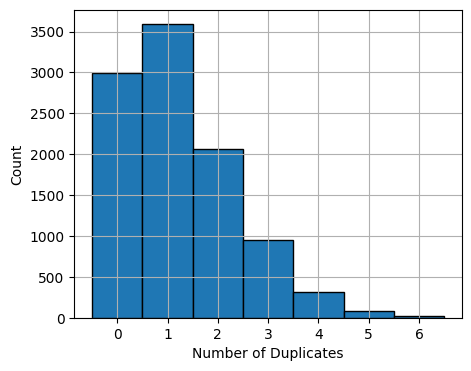

In [22]:
plt.figure(figsize=(5,4))
plt.hist(results, edgecolor='black', bins=np.arange(-0.5, 7.5))
plt.xlabel("Number of Duplicates")
plt.ylabel("Count")
plt.grid()
plt.show()

---

## Part 4: Hypothesis Testing

To see how close our simulation results are to the birthday paradox percentage, we need to find the probability of getting at least one duplicate birthday from the simulation results.

### Question 7

The observed probability of at least one duplicate birthday is:
$$
P( \text{at least one duplicate}) = \frac{\text{number of duplicates}}{\text{total number of iterations}}
$$
<br>

7a. Write code to **find and print `p_at_least_one`**, the P(at_least_one_duplicate), by following these steps:
- find the number of values in `results` that are greater than 0. This is the number of duplicates.
- divide this number by the total number of iterations.
- print the probability as a percentage, rounded to 2 digits.

In [24]:
# find how many samples had at least one duplicate birthday
num_with_duplicates = np.sum(results > 0)
p_at_least_one = (num_with_duplicates / len(results)) * 100
print("P(at_least_one_duplicate):", round(p_at_least_one, 2))

P(at_least_one_duplicate): 70.09


7b. To visually compare the expected and observed probabilities for having at least one duplicate birthday, we use a bar chart.

**Run the Code cell below** with your `p_at_least_one_duplicate` and the expected 50.73% probability.

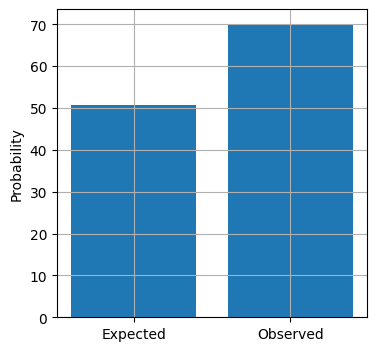

In [25]:
plt.figure(figsize=(4,4))
plt.bar([0,1],[50.73,p_at_least_one])
plt.xticks([0,1],["Expected","Observed"])
plt.ylabel("Probability")
plt.grid()
plt.show()

7c. Based on your observed probability of at least one duplicate birthday, **answer the following 2 questions** in the Text cell below:

- Does the observed probability reject the null hypothesis, or fail to reject the null hypothesis?
- Is it likely that the data in the dataset was randomly selected from the population?



The observed probability rejects the null hypothesis

The data was not random